In [14]:
import pandas as pd

df = pd.read_csv('dataprocessed.csv')

print(df.head())



    Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  30.0  Female    39.0             14.0            5.0           18.0   
1  65.0  Female    49.0              1.0           10.0            8.0   
2  55.0  Female    14.0              4.0            6.0           18.0   
3  58.0    Male    38.0             21.0            7.0            7.0   
4  23.0    Male    32.0             20.0            5.0            8.0   

  Subscription Type Contract Length  Total Spend  Churn  Recency  \
0          Standard          Annual        932.0    1.0     13.0   
1             Basic         Monthly        557.0    1.0     24.0   
2             Basic       Quarterly        185.0    1.0     27.0   
3          Standard         Monthly        396.0    1.0      1.0   
4             Basic         Monthly        617.0    1.0     10.0   

   Usage Intensity  Monthly Spend  Support Call Frequency  \
0         0.358974      23.897436                0.128205   
1         0.020408      

In [21]:
print(df.columns)


Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend', 'Churn',
       'Recency', 'Usage Intensity', 'Monthly Spend', 'Support Call Frequency',
       'Payment Reliability', 'Tenure Contract', 'Subscription Spend',
       'Gender_Male'],
      dtype='object')


In [23]:
print(df.columns)


Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend', 'Churn',
       'Recency', 'Usage Intensity', 'Monthly Spend', 'Support Call Frequency',
       'Payment Reliability', 'Tenure Contract', 'Subscription Spend',
       'Gender_Male'],
      dtype='object')


In [16]:
df.size

print(df.columns.tolist())


['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Churn', 'Recency', 'Usage Intensity', 'Monthly Spend', 'Support Call Frequency', 'Payment Reliability', 'Tenure Contract', 'Subscription Spend']


In [15]:


# 2. Ordinal Encode Subscription Type
subscription_order = {'Basic': 0, 'Standard': 1, 'Premium': 2}
df['Subscription Type'] = df['Subscription Type'].map(subscription_order)

# 3. Numerical Encode Contract Length
contract_mapping = {'Monthly': 1, 'Quarterly': 3, 'Annual': 12}
df['Contract Length'] = df['Contract Length'].map(contract_mapping)

print(df.head())


    Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  30.0  Female    39.0             14.0            5.0           18.0   
1  65.0  Female    49.0              1.0           10.0            8.0   
2  55.0  Female    14.0              4.0            6.0           18.0   
3  58.0    Male    38.0             21.0            7.0            7.0   
4  23.0    Male    32.0             20.0            5.0            8.0   

   Subscription Type  Contract Length  Total Spend  Churn  Recency  \
0                  1               12        932.0    1.0     13.0   
1                  0                1        557.0    1.0     24.0   
2                  0                3        185.0    1.0     27.0   
3                  1                1        396.0    1.0      1.0   
4                  0                1        617.0    1.0     10.0   

   Usage Intensity  Monthly Spend  Support Call Frequency  \
0         0.358974      23.897436                0.128205   
1         0.

In [17]:
print(df.columns.tolist())


['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Churn', 'Recency', 'Usage Intensity', 'Monthly Spend', 'Support Call Frequency', 'Payment Reliability', 'Tenure Contract', 'Subscription Spend']


In [18]:
print('Gender' in df.columns)


True


In [19]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [20]:
print(df.columns.tolist())


['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Churn', 'Recency', 'Usage Intensity', 'Monthly Spend', 'Support Call Frequency', 'Payment Reliability', 'Tenure Contract', 'Subscription Spend', 'Gender_Male']


In [24]:
from sklearn.preprocessing import StandardScaler


columns_to_scale = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 
                    'Subscription Type', 'Contract Length', 'Total Spend', 'Recency', 
                    'Usage Intensity', 'Monthly Spend', 'Support Call Frequency', 'Payment Reliability', 
                    'Tenure Contract', 'Subscription Spend', 'Gender_Male']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Now df contains the scaled features
print(df)

             Age    Tenure  Usage Frequency  Support Calls  Payment Delay  \
0      -0.753326  0.448760        -0.210511       0.454549       0.609620   
1       2.059646  1.028278        -1.724562       2.083100      -0.601319   
2       1.255940 -1.000036        -1.375166       0.780259       0.609620   
3       1.497051  0.390808         0.604748       1.105969      -0.722413   
4      -1.315921  0.043097         0.488282       0.454549      -0.601319   
...          ...       ...              ...            ...            ...   
440827  0.211121  1.318037        -0.094045      -0.848291      -1.206788   
440828 -1.155179 -1.347747        -0.326976      -0.848291       0.851808   
440829 -1.074809  0.216952         1.303541      -0.848291      -0.964600   
440830 -0.914068  1.375989        -0.210511      -0.522581      -1.570070   
440831 -0.672956  0.970326         0.488282      -0.848291       0.125245   

        Subscription Type  Contract Length  Total Spend  Churn   Recency  \

In [25]:
df.to_csv('processed_scaled_data.csv', index=False)
print("DataFrame saved as 'processed_scaled_data.csv'")

df.to_pickle('processed_scaled_data.pkl')
print("DataFrame saved as 'processed_scaled_data.pkl'")

DataFrame saved as 'processed_scaled_data.csv'
DataFrame saved as 'processed_scaled_data.pkl'


In [26]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Check balance
print("\nOriginal Churn distribution:")
print(df['Churn'].value_counts())
print("\nTraining Churn distribution:")
print(y_train.value_counts())
print("\nTesting Churn distribution:")
print(y_test.value_counts())

Training set shape: (352665, 16) (352665,)
Testing set shape: (88167, 16) (88167,)

Original Churn distribution:
Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

Training Churn distribution:
Churn
1.0    199999
0.0    152666
Name: count, dtype: int64

Testing Churn distribution:
Churn
1.0    50000
0.0    38167
Name: count, dtype: int64


# Logistic Regression
## Balancing:  class_weight='balanced'.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model_lr = LogisticRegression(class_weight='balanced', random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1]))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86     38167
         1.0       0.92      0.85      0.88     50000

    accuracy                           0.87     88167
   macro avg       0.87      0.87      0.87     88167
weighted avg       0.87      0.87      0.87     88167

AUC-ROC: 0.9447432488799223


# Random Forest
## Balancing:  class_weight='balanced'.

In [29]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1]))

Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

AUC-ROC: 0.9999993347656352


# Gradient Boosting (XGBoost)
## Balancing: scale_pos_weight
###           scale_pos_weight = num_negative / num_positive = 152666 / 199999 ≈ 0.76

In [30]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(scale_pos_weight=0.76, random_state=42, eval_metric='logloss')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print("XGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1]))

XGBoost - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

AUC-ROC: 0.9999998270757461


# Support Vector Machine (SVM) 
## Balancing:  class_weight='balanced'.
###  (using a subset, my dataset is large

In [31]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV  # For probabilities

model_svm = LinearSVC(class_weight='balanced', random_state=42, max_iter=1000)
model_svm_calibrated = CalibratedClassifierCV(model_svm)  # To get probabilities
model_svm_calibrated.fit(X_train[:50000], y_train[:50000])  # Subset for speed
y_pred_svm = model_svm_calibrated.predict(X_test)
print("SVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("AUC-ROC:", roc_auc_score(y_test, model_svm_calibrated.predict_proba(X_test)[:, 1]))

SVM - Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85     38167
         1.0       0.90      0.87      0.88     50000

    accuracy                           0.87     88167
   macro avg       0.87      0.87      0.87     88167
weighted avg       0.87      0.87      0.87     88167

AUC-ROC: 0.9446421584090969


# K-Nearest Neighbors (KNN)
## Balancing  :  SMOTE

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_resampled[:50000], y_train_resampled[:50000])  # Subset for speed
y_pred_knn = model_knn.predict(X_test)
print("KNN - Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN - Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     38167
         1.0       0.99      0.87      0.93     50000

    accuracy                           0.92     88167
   macro avg       0.92      0.93      0.92     88167
weighted avg       0.93      0.92      0.92     88167



# Compare Models

In [35]:
models = {
    'Logistic Regression': model_lr,
    'Random Forest': model_rf,
    'XGBoost': model_xgb,
    'SVM': model_svm_calibrated,
    'KNN': model_knn,
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))
    if hasattr(model, 'predict_proba'):  # Check if model supports predict_proba
        print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    else:
        print("AUC-ROC: Not available (model does not support predict_proba)")


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86     38167
         1.0       0.92      0.85      0.88     50000

    accuracy                           0.87     88167
   macro avg       0.87      0.87      0.87     88167
weighted avg       0.87      0.87      0.87     88167

AUC-ROC: 0.9447432488799223

Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

AUC-ROC: 0.9999993347656352

XGBoost:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00 

# randomforest AUC-ROC: 0.9999993347656352
# XGBoost   .........   AUC-ROC: 0.9999998270757461


In [36]:
import joblib
import os

# Create a directory to save the models (if it doesn't exist)
if not os.path.exists('models'):
    os.makedirs('models')

# Save each model to a separate file
for name, model in models.items():
    # Replace spaces with underscores for file names
    model_filename = f"models/{name.replace(' ', '_')}_model.joblib"
    joblib.dump(model, model_filename)
    print(f"Saved {name} to {model_filename}")

Saved Logistic Regression to models/Logistic_Regression_model.joblib
Saved Random Forest to models/Random_Forest_model.joblib
Saved XGBoost to models/XGBoost_model.joblib
Saved SVM to models/SVM_model.joblib
Saved KNN to models/KNN_model.joblib


# test 

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)  # Fit on training data
joblib.dump(scaler, 'models/scaler.pkl')  # Save scaler

['models/scaler.pkl']

In [42]:
scaler = joblib.load('models/scaler.pkl')
print(scaler.feature_names_in_)

['Age' 'Tenure' 'Usage Frequency' 'Support Calls' 'Payment Delay'
 'Subscription Type' 'Contract Length' 'Total Spend' 'Recency'
 'Usage Intensity' 'Monthly Spend' 'Support Call Frequency'
 'Payment Reliability' 'Tenure Contract' 'Subscription Spend'
 'Gender_Male']


In [46]:
import pandas as pd
import joblib
import os

def predict_churn():
    # Define mappings for categorical to numeric conversion
    contract_mapping = {'Monthly': 1, 'Quarterly': 3, 'Annual': 12}
    subscription_mapping = {'Basic': 0, 'Standard': 1, 'Premium': 2}

    # Prompt user for input
    print("Please enter the following details for prediction:")
    try:
        age = float(input("Age: "))
        gender = input("Gender (Male/Female): ").strip().capitalize()
        tenure = float(input("Tenure: "))
        usage_frequency = float(input("Usage Frequency: "))
        support_calls = float(input("Support Calls: "))
        payment_delay = float(input("Payment Delay: "))
        subscription_type = input("Subscription Type (Basic/Standard/Premium): ").strip().capitalize()
        contract_length = input("Contract Length (Monthly/Quarterly/Annual): ").strip().capitalize()
        total_spend = float(input("Total Spend: "))
        last_interaction = float(input("Last Interaction: "))
    except ValueError:
        raise ValueError("All numeric inputs (Age, Tenure, etc.) must be valid numbers.")

    # Create a DataFrame with the input
    data = {
        'Age': [age],
        'Gender': [gender],
        'Tenure': [tenure],
        'Usage Frequency': [usage_frequency],
        'Support Calls': [support_calls],
        'Payment Delay': [payment_delay],
        'Subscription Type': [subscription_type],
        'Contract Length': [contract_length],
        'Total Spend': [total_spend],
        'Last Interaction': [last_interaction]
    }
    df = pd.DataFrame(data)

    # Process derived features (matching training)
    df['Monthly Spend'] = df['Total Spend'] / df['Tenure'].replace(0, 1)
    df['Usage Intensity'] = df['Usage Frequency'] / df['Tenure'].replace(0, 1)
    df['Support Call Frequency'] = df['Support Calls'] / df['Tenure'].replace(0, 1)
    df['Payment Reliability'] = 1 / (df['Payment Delay'] + 1)
    df['Recency'] = df['Last Interaction'].max() - df['Last Interaction']
    df['Tenure Contract'] = df['Tenure'] * df['Contract Length'].map(contract_mapping)  # Numeric conversion
    df['Subscription Spend'] = df['Monthly Spend'] * df['Subscription Type'].map(subscription_mapping)  # Numeric conversion

    # One-hot encode only Gender
    df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

    # Convert categorical columns to numeric using mappings
    df['Contract Length'] = df['Contract Length'].map(contract_mapping)
    df['Subscription Type'] = df['Subscription Type'].map(subscription_mapping)

    # Ensure all required columns are present (match training exactly)
    required_columns = [
        'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
        'Subscription Type', 'Contract Length', 'Total Spend', 'Recency',
        'Usage Intensity', 'Monthly Spend', 'Support Call Frequency',
        'Payment Reliability', 'Tenure Contract', 'Subscription Spend',
        'Gender_Male'
    ]
    for col in required_columns:
        if col not in df.columns:
            df[col] = 0  # Default value for missing categories

    # Load saved models
    model_dir = 'models'
    model_files = {
        'Logistic Regression': f'{model_dir}/Logistic_Regression_model.joblib',
        'Random Forest': f'{model_dir}/Random_Forest_model.joblib',
        'XGBoost': f'{model_dir}/XGBoost_model.joblib',
        'SVM': f'{model_dir}/SVM_model.joblib',
        'KNN': f'{model_dir}/KNN_model.joblib',
    }

    models = {}
    for name, file_path in model_files.items():
        if os.path.exists(file_path):
            models[name] = joblib.load(file_path)
            print(f"Loaded {name} model from {file_path}")
        else:
            print(f"Warning: {file_path} not found. Skipping {name}.")

    # Prepare features for prediction (match training data columns)
    X = df[required_columns]

    # Load the scaler
    scaler_path = 'models/scaler.pkl'
    if os.path.exists(scaler_path):
        try:
            scaler = joblib.load(scaler_path)
            print(f"Loaded scaler from {scaler_path}")
            if not hasattr(scaler, 'transform'):
                raise ValueError(f"Loaded object from {scaler_path} is not a valid scaler. Expected StandardScaler.")
        except Exception as e:
            raise ValueError(f"Error loading scaler from {scaler_path}: {str(e)}. Please ensure the scaler was saved correctly.")
    else:
        raise FileNotFoundError(f"Scaler file {scaler_path} not found. Please save the scaler during training.")

    # Scale features and convert back to DataFrame with feature names
    X_scaled = scaler.transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=required_columns)

    # Predict and get probabilities for all models
    results = {}
    for name, model in models.items():
        if hasattr(model, 'predict_proba'):
            prob = model.predict_proba(X_scaled_df)[:, 1][0]  # Probability of churn (class 1)
            prediction = 1 if prob > 0.5 else 0
            results[name] = {'Prediction': prediction, 'Probability': prob}
        else:
            prediction = model.predict(X_scaled_df)[0]
            results[name] = {'Prediction': prediction, 'Probability': None}
            print(f"{name} does not support predict_proba; providing binary prediction only.")

    # Output results
    print("\nChurn Prediction Results:")
    for name, result in results.items():
        pred = "Churn" if result['Prediction'] == 1 else "Not Churn"
        prob = f" (Probability: {result['Probability']:.2f})" if result['Probability'] is not None else ""
        print(f"{name}: {pred}{prob}")

    return df, results

# Run the function
if __name__ == "__main__":
    processed_df, predictions = predict_churn()
    print("\nProcessed DataFrame:")
    print(processed_df)

Please enter the following details for prediction:


Age:  20
Gender (Male/Female):  Male
Tenure:  25
Usage Frequency:  30
Support Calls:  2
Payment Delay:  3
Subscription Type (Basic/Standard/Premium):  Premium
Contract Length (Monthly/Quarterly/Annual):  Annual
Total Spend:  15000
Last Interaction:  4


Loaded Logistic Regression model from models/Logistic_Regression_model.joblib
Loaded Random Forest model from models/Random_Forest_model.joblib
Loaded XGBoost model from models/XGBoost_model.joblib
Loaded SVM model from models/SVM_model.joblib
Loaded KNN model from models/KNN_model.joblib
Loaded scaler from models/scaler.pkl

Churn Prediction Results:
Logistic Regression: Not Churn (Probability: 0.00)
Random Forest: Churn (Probability: 0.99)
XGBoost: Churn (Probability: 1.00)
SVM: Not Churn (Probability: 0.00)
KNN: Not Churn (Probability: 0.40)

Processed DataFrame:
    Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  20.0    25.0             30.0            2.0            3.0   

   Subscription Type  Contract Length  Total Spend  Last Interaction  \
0                  2               12      15000.0               4.0   

   Monthly Spend  Usage Intensity  Support Call Frequency  \
0          600.0              1.2                    0.08   

   Payment Reliability  Re

In [50]:
# During training, save the split
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Then load it
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')['Churn']


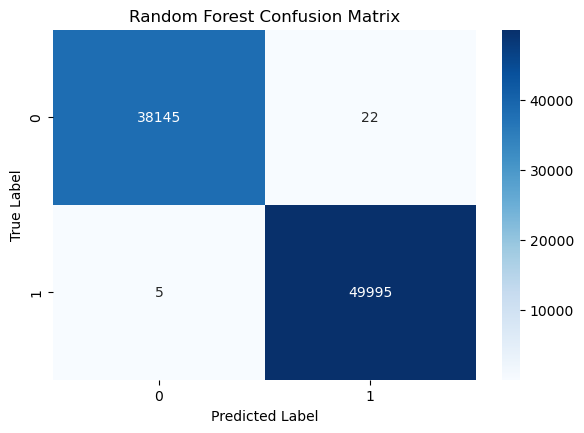

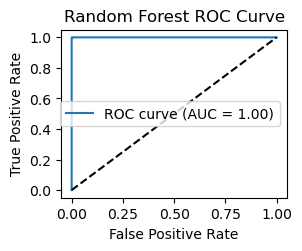

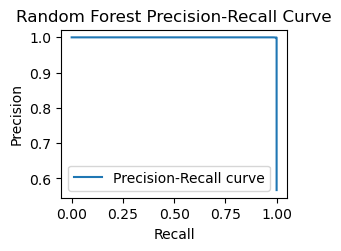

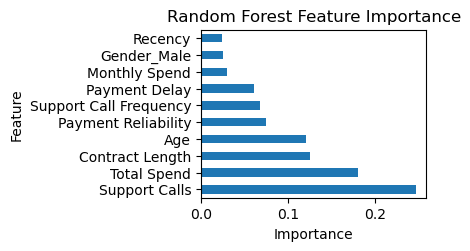

In [62]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Load the scaler and Random Forest model
scaler = joblib.load('models/scaler.pkl')
rf_model = joblib.load('models/Random_Forest_model.joblib')

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame with feature names
feature_names = X_test.columns  # Preserve the original feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Make predictions
y_pred_proba = rf_model.predict_proba(X_test_scaled_df)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

# Create a figure for the plots
plt.figure(figsize=(15, 10))

# Confusion Matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
plt.subplot(2, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Precision-Recall Curve
plt.subplot(2, 2, 3)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.title('Random Forest Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Feature Importance
plt.subplot(2, 2, 4)
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

plt.tight_layout()
plt.savefig('random_forest_evaluations.png')
plt.close()

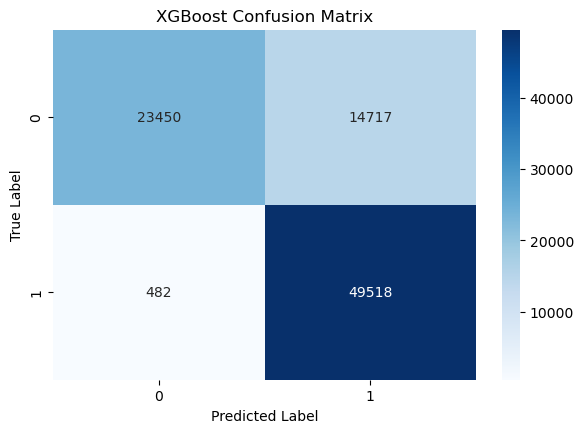

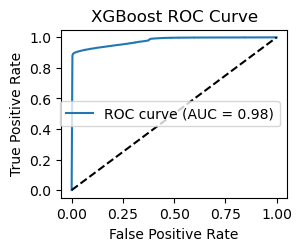

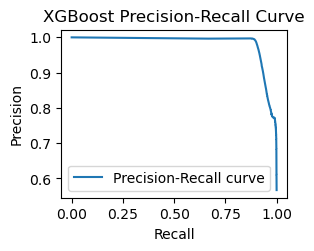

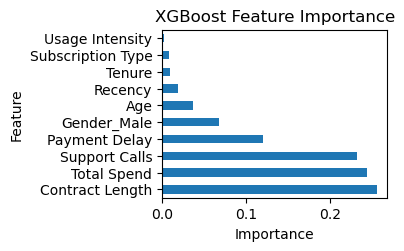

In [63]:
 import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Load the scaler and XGBoost model
scaler = joblib.load('models/scaler.pkl')
xgb_model = joblib.load('models/XGBoost_model.joblib')

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame with feature names to avoid warning
feature_names = X_test.columns  # Preserve the original feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Make predictions
y_pred_proba = xgb_model.predict_proba(X_test_scaled_df)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

# Create a figure for the plots
plt.figure(figsize=(15, 10))

# Confusion Matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# ROC Curve
plt.subplot(2, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('XGBoost ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Precision-Recall Curve
plt.subplot(2, 2, 3)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.title('XGBoost Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


# Feature Importance
plt.subplot(2, 2, 4)
importances = xgb_model.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


plt.tight_layout()
plt.savefig('xgboost_evaluations.png')
plt.close()

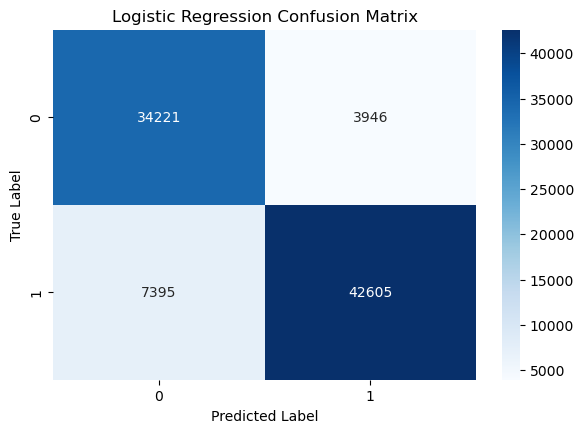

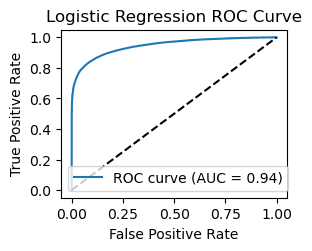

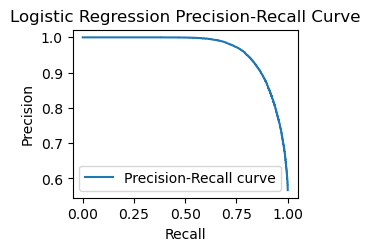

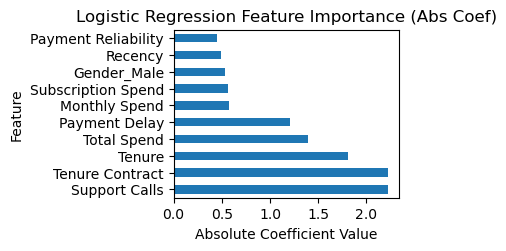

In [65]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Load the scaler and Logistic Regression model
scaler = joblib.load('models/scaler.pkl')
lr_model = joblib.load('models/Logistic_Regression_model.joblib')

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame with feature names to avoid warning
feature_names = X_test.columns  # Preserve the original feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Make predictions
y_pred_proba = lr_model.predict_proba(X_test_scaled_df)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

# Create a figure for the plots
plt.figure(figsize=(15, 10))

# Confusion Matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# ROC Curve
plt.subplot(2, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Precision-Recall Curve
plt.subplot(2, 2, 3)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.title('Logistic Regression Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


# Feature Importance (using coefficients for Logistic Regression)
plt.subplot(2, 2, 4)
coef = lr_model.coef_[0]  # Coefficients for binary classification
feat_importances = pd.Series(abs(coef), index=feature_names)  # Use absolute values
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Logistic Regression Feature Importance (Abs Coef)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()


plt.tight_layout()
plt.savefig('logistic_regression_evaluations.png')
plt.close()

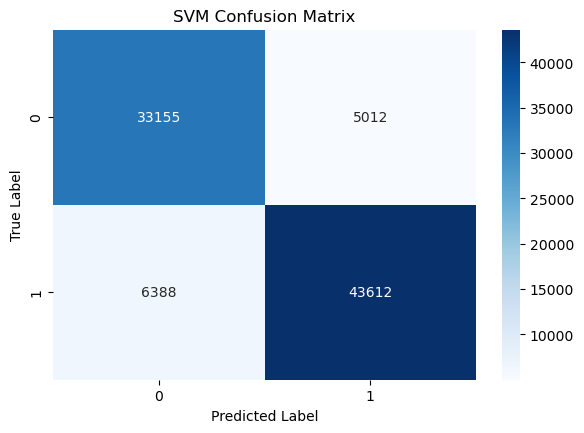

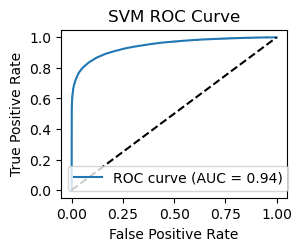

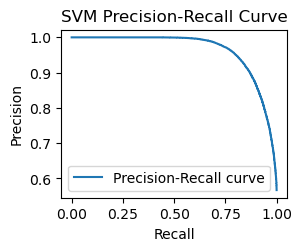

In [67]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Load the scaler and SVM model
scaler = joblib.load('models/scaler.pkl')
svm_model = joblib.load('models/SVM_model.joblib')

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame with feature names to avoid warning
feature_names = X_test.columns  # Preserve the original feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Make predictions
# Check if the SVM model supports predict_proba (assumed enabled based on prior usage)
if hasattr(svm_model, 'predict_proba'):
    y_pred_proba = svm_model.predict_proba(X_test_scaled_df)[:, 1]
    y_pred = (y_pred_proba > 0.5).astype(int)
else:
    y_pred = svm_model.predict(X_test_scaled_df)
    y_pred_proba = None

# Create a figure for the plots
plt.figure(figsize=(15, 10))

# Confusion Matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# ROC Curve (if predict_proba is available)
if y_pred_proba is not None:
    plt.subplot(2, 2, 2)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('SVM ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    plt.subplot(2, 2, 3)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.title('SVM Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

else:
    # Placeholder for ROC Curve subplot if predict_proba is not available
    plt.subplot(2, 2, 2)
    plt.text(0.5, 0.5, 'ROC Curve\n(predict_proba not available)', 
             ha='center', va='center', fontsize=12)
    plt.title('SVM ROC Curve')
    plt.axis('off')
    plt.show()


    # Placeholder for Precision-Recall Curve subplot
    plt.subplot(2, 2, 3)
    plt.text(0.5, 0.5, 'Precision-Recall Curve\n(predict_proba not available)', 
             ha='center', va='center', fontsize=12)
    plt.title('SVM Precision-Recall Curve')
    plt.axis('off')
    plt.show()


 

plt.tight_layout()
plt.savefig('svm_evaluations.png')
plt.close()

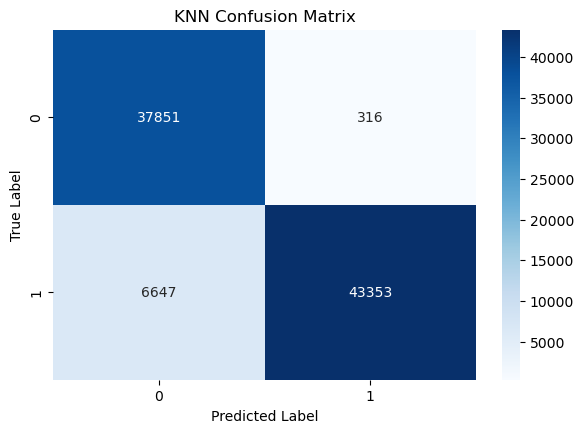

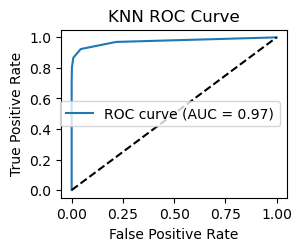

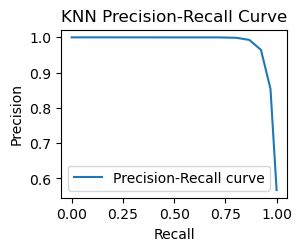

In [68]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Load the scaler and KNN model
scaler = joblib.load('models/scaler.pkl')
knn_model = joblib.load('models/KNN_model.joblib')

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame with feature names to avoid warning
feature_names = X_test.columns  # Preserve the original feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Make predictions
y_pred = knn_model.predict(X_test_scaled_df)
y_pred_proba = knn_model.predict_proba(X_test_scaled_df)[:, 1]  # If using a probabilistic KNN

# Create a figure for the plots
plt.figure(figsize=(15, 10))

# Confusion Matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
plt.subplot(2, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Precision-Recall Curve
plt.subplot(2, 2, 3)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.title('KNN Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()
 
plt.tight_layout()
plt.savefig('knn_evaluations.png')
plt.close()
